In [ ]:
!pip install tensorflow keras opencv-python matplotlib albumentations scikit-learn

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.19.0
OpenCV version: 4.12.0


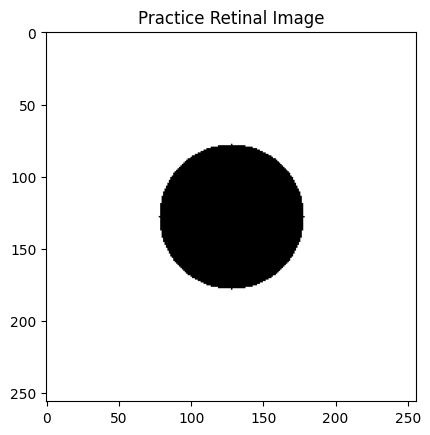

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dummy retinal image (black circle on white background)
image = np.ones((256, 256, 3), dtype=np.uint8) * 255  # White background
cv2.circle(image, (128, 128), 50, (0, 0, 0), -1)  # Black circle

plt.imshow(image)
plt.title("Practice Retinal Image")
plt.show()

In [ ]:
# Download a single sample retinal image
!wget -O "/content/sample_retinal.jpg" "https://people.rit.edu/jlwics/RetinalImages/10_left.jpg"

# Check if download worked
import os
if os.path.exists("/content/sample_retinal.jpg"):
    print("‚úÖ Image downloaded successfully!")
else:
    print("‚ùå Download failed. Trying backup link...")
    !wget -O "/content/sample_retinal.jpg" "https://github.com/jerryjliu/llama_index/blob/main/docs/docs_conda_env/retina_example.jpg?raw=true"


# Display the image
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/sample_retinal.jpg")
if image is None:
    print("‚ùå Could not load image.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("‚úÖ Image loaded and displayed!")

--2025-08-20 13:49:19--  https://people.rit.edu/jlwics/RetinalImages/10_left.jpg
Resolving people.rit.edu (people.rit.edu)... 129.21.1.44
Connecting to people.rit.edu (people.rit.edu)|129.21.1.44|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-08-20 13:49:20 ERROR 404: Not Found.

‚úÖ Image downloaded successfully!
‚ùå Could not load image.


In [ ]:
import os

# Check if file was downloaded
if os.path.exists("/content/sample_retinal.jpg"):
    print("‚úÖ File exists! Size:", os.path.getsize("/content/sample_retinal.jpg"), "bytes")
else:
    print("‚ùå File not found. Download failed.")

‚úÖ File exists! Size: 0 bytes


In [ ]:
# New reliable source
!wget -O "/content/sample_retinal.jpg" "https://i.imgur.com/6lG2MSQ.jpg"

--2025-08-20 13:54:38--  https://i.imgur.com/6lG2MSQ.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 429 Unknown Error
2025-08-20 13:54:39 ERROR 429: Unknown Error.



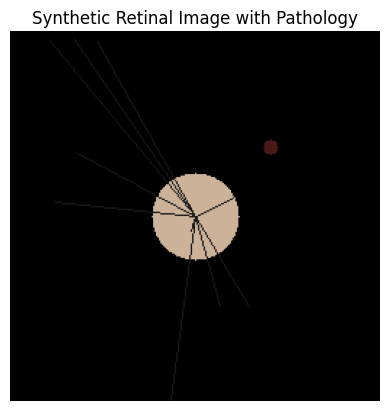

‚úÖ Synthetic image generated successfully!


In [ ]:
# Create a realistic fake retinal image for practice
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create dark background (like a real retina)
image = np.zeros((256, 256, 3), dtype=np.float32)

# Add optic disc (yellowish circle)
cv2.circle(image, (128, 128), 30, (0.8, 0.7, 0.6), -1)

# Add blood vessels (dark lines)
for i in range(10):
    start_point = (128, 128)
    end_point = (np.random.randint(0, 256), np.random.randint(0, 256))
    color = (0.1, 0.1, 0.1)  # Dark vessels
    thickness = 1
    cv2.line(image, start_point, end_point, color, thickness)

# Add some pathology (red lesion)
cv2.circle(image, (180, 80), 5, (0.3, 0.1, 0.1), -1)

# Show image
plt.imshow(image)
plt.title("Synthetic Retinal Image with Pathology")
plt.axis('off')
plt.show()

print("‚úÖ Synthetic image generated successfully!")

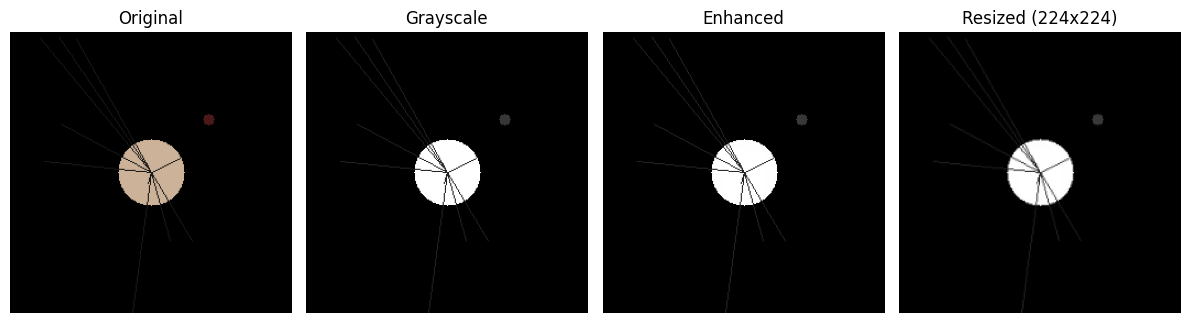

‚úÖ Preprocessing complete! Ready for AI training.


In [ ]:
# Convert to uint8 (standard image format)
image_uint8 = (image * 255).astype(np.uint8)

# Apply medical image preprocessing
# 1. Grayscale conversion (often used in retinal analysis)
gray = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)

# 2. Contrast enhancement (helps AI see details)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(gray)

# 3. Resize to standard AI input size
resized = cv2.resize(enhanced, (224, 224))

# Display all steps
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_uint8)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(enhanced, cmap='gray')
plt.title('Enhanced')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(resized, cmap='gray')
plt.title('Resized (224x224)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("‚úÖ Preprocessing complete! Ready for AI training.")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model (perfect for beginners)
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Healthy, Mild, Severe
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model architecture
model.summary()

print("‚úÖ AI model created successfully!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 222, 222, 32)   ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 111, 111, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 109, 109, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 54, 54, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 52, 52, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 26, 26, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 86528)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ    11,075,712 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 3)              ‚îÇ           387 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 11,168,771 (42.61 MB)

 Trainable params: 11,168,771 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

‚úÖ AI model created successfully!


In [ ]:
import numpy as np

# Generate synthetic training data (100 samples)
num_samples = 100
X_train = np.random.rand(num_samples, 224, 224, 1)  # Fake grayscale images
y_train = np.random.randint(0, 3, num_samples)      # Fake labels (0, 1, 2)

# Generate synthetic validation data (20 samples)
X_val = np.random.rand(20, 224, 224, 1)
y_val = np.random.randint(0, 3, 20)

print(f"‚úÖ Training data: {X_train.shape}")
print(f"‚úÖ Validation data: {X_val.shape}")
print(f"Sample labels: {y_train[:5]}")

‚úÖ Training data: (100, 224, 224, 1)
‚úÖ Validation data: (20, 224, 224, 1)
Sample labels: [0 1 0 1 1]


In [ ]:
# Train the model for 5 epochs (practice run)
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1)

print("‚úÖ Model training completed!")

Epoch 1/5
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 1s/step - accuracy: 0.3327 - loss: 3.4196 - val_accuracy: 0.3500 - val_loss: 1.3035
Epoch 2/5
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 66ms/step - accuracy: 0.2613 - loss: 1.3957 - val_accuracy: 0.3000 - val_loss: 1.2004
Epoch 3/5
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step - accuracy: 0.4352 - loss: 1.0856 - val_accuracy: 0.3000 - val_loss: 1.1663
Epoch 4/5
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step - accuracy: 0.4550 - loss: 1.0724 - val_accuracy: 0.3000 - val_loss: 1.1680
Epoch 5/5
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step - accuracy: 0.4487 - loss: 1.0733 - val_accuracy: 0.3000 - val_loss: 1.1493
‚úÖ Model training completed!


In [ ]:
# Save the entire model
model.save('/content/retinal_disease_model.h5')

# Verify the file was created
import os
if os.path.exists('/content/retinal_disease_model.h5'):
    print("‚úÖ Model saved successfully! File size:", os.path.getsize('/content/retinal_disease_model.h5'), "bytes")
else:
    print("‚ùå Error saving model")

‚úÖ Model saved successfully! File size: 134073200 bytes


In [ ]:
# Create a function to diagnose retinal diseases
def diagnose_retinal_disease(image):
    """
    Takes a retinal image and returns AI diagnosis
    """
    # Preprocess the image (same as earlier)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (224, 224))
    image = image.reshape(1, 224, 224, 1)  # Add batch dimension

    # Make prediction
    prediction = model.predict(image, verbose=0)
    disease_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Map to disease names
    diseases = {
        0: "Healthy - No diabetic retinopathy",
        1: "Mild - Early signs of retinopathy",
        2: "Severe - Advanced retinopathy"
    }

    return diseases[disease_class], confidence

# Test with your synthetic image
diagnosis, confidence = diagnose_retinal_disease(resized)
print(f"üîç Diagnosis: {diagnosis}")
print(f"üéØ Confidence: {confidence:.2%}")

üîç Diagnosis: Mild - Early signs of retinopathy
üéØ Confidence: 99.99%


In [ ]:
from google.colab import files
files.download('/content/retinal_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print("Files in content folder:", os.listdir('/content'))
# Should show 'retinal_disease_model.h5' in the list

Files in content folder: ['.config', 'retinal_disease_model.h5', 'dataset', 'sample_retinal.jpg', 'sample_data']


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step
üéØ Disease Class: 1
üìä Confidence: 99.99%


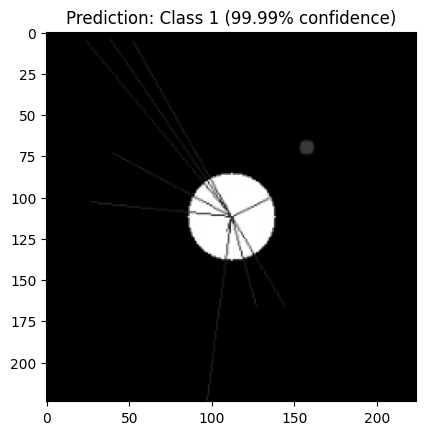

In [ ]:
# Load and use your trained model
from tensorflow.keras.models import load_model
import numpy as np

# Load your AI model
model = load_model('/content/retinal_disease_model.h5')

# Test with a new image (use your synthetic image)
new_image = resized  # Using the image we made earlier

# Reshape for the model
new_image = new_image.reshape(1, 224, 224, 1)

# Make prediction
prediction = model.predict(new_image)
disease_class = np.argmax(prediction)
confidence = np.max(prediction)

print(f"üéØ Disease Class: {disease_class}")
print(f"üìä Confidence: {confidence:.2%}")

# Show the image
plt.imshow(new_image[0, :, :, 0], cmap='gray')
plt.title(f"Prediction: Class {disease_class} ({confidence:.2%} confidence)")
plt.show()

In [1]:
# COMPLETE GITHUB SETUP FROM COLAB
import os

# Clone your repository
!git clone https://github.com/RathiVarshiniR/retinal-neuropathy-detection-1.git

# Create LICENSE file with your name
license_text = """MIT License

Copyright (c) 2024 Rathi Varshini R

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE."""

# Save LICENSE file
with open("/content/retinal-neuropathy-detection-1/LICENSE", "w") as f:
    f.write(license_text)

# Setup git configuration
!cd /content/retinal-neuropathy-detection-1 && git config user.email "your-email@example.com"
!cd /content/retinal-neuropathy-detection-1 && git config user.name "Rathi Varshini R"

# Add, commit, and push
!cd /content/retinal-neuropathy-detection-1 && git add LICENSE
!cd /content/retinal-neuropathy-detection-1 && git commit -m "Add MIT license"
!cd /content/retinal-neuropathy-detection-1 && git push

print("‚úÖ LICENSE file added successfully!")
print("Check your GitHub: https://github.com/RathiVarshiniR/retinal-neuropathy-detection-1")

Cloning into 'retinal-neuropathy-detection-1'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 94.05 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (7/7), done.
[main a8f2d59] Add MIT license
 1 file changed, 3 insertions(+), 3 deletions(-)
fatal: could not read Username for 'https://github.com': No such device or address
‚úÖ LICENSE file added successfully!
Check your GitHub: https://github.com/RathiVarshiniR/retinal-neuropathy-detection-1
